### Objectif : Identification des caractéristiques des véhicules qui émettent le plus de CO2 à partir des données des émissions de CO2 des véhicules en France

In [48]:
import pandas as pd

In [49]:
df = pd.read_csv('data.csv', index_col='ID', low_memory=False)

In [50]:
df.head()

,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,Ve,...,IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,Electric range (km)
ID,,,,,,,,,,,,,,,,,,,,,
77798939,FR,IP-DGY____EAT82552-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,NaN,e9*2018/858*11066*03,N,D,DGYP-A1C000,...,NaN,NaN,NaN,NaN,NaN,P,2022,2022-12-30,1.3,59.0
77798940,FR,IP-DGY____EAT82552-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,NaN,e9*2018/858*11066*03,N,D,DGYP-A1C000,...,NaN,NaN,NaN,NaN,NaN,P,2022,2022-10-27,1.3,60.0
77798941,FR,IP-DGY____EAT82552-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,NaN,e9*2018/858*11066*03,N,D,DGYP-A1C000,...,NaN,NaN,NaN,NaN,NaN,P,2022,2022-10-31,1.3,59.0
77798942,FR,IP-DGY____EAT82552-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,NaN,e9*2018/858*11066*03,N,D,DGYP-A1C000,...,NaN,NaN,NaN,NaN,NaN,P,2022,2022-11-30,1.3,59.0
77798943,FR,IP-DGY____EAT82552-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,NaN,e9*2018/858*11066*03,N,D,DGYP-A1C000,...,NaN,NaN,NaN,NaN,NaN,P,2022,2022-10-27,1.3,60.0


## Suppression de colonnes vides, inutiles pour l'analyse, constantes...

In [51]:
df = df.drop(['MMS','Ernedc (g/km)', 'De', 'Vf'], axis=1)

In [52]:
df=df.drop(['Country','Status','VFN','Mp','Mh','Man','Mk','Cn', 'Tan','T','Va','Ve','IT','Date of registration','Ct','Erwltp (g/km)',],axis=1)

In [53]:
df = df.drop(['Enedc (g/km)'], axis=1)

In [54]:
df = df.drop(['r', 'year'], axis=1)

In [55]:
df.head()

,Cr,m (kg),Mt,Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),Fuel consumption,Electric range (km)
ID,,,,,,,,,,,,,,
77798939,M1,1797,1888,30,2785,1600,1605,PETROL/ELECTRIC,P,1598.0,132,159.0,1.3,59.0
77798940,M1,1797,1876,29,2785,1600,1605,PETROL/ELECTRIC,P,1598.0,132,159.0,1.3,60.0
77798941,M1,1797,1886,30,2785,1600,1605,PETROL/ELECTRIC,P,1598.0,132,159.0,1.3,59.0
77798942,M1,1797,1895,30,2785,1600,1605,PETROL/ELECTRIC,P,1598.0,132,159.0,1.3,59.0
77798943,M1,1797,1874,29,2785,1600,1605,PETROL/ELECTRIC,P,1598.0,132,159.0,1.3,60.0


## Suppression des véhicules avec motorisation électrique car ils n'émettent pas de C02

In [56]:
df=df[(df['Ft']!='ELECTRIC') & (df['Ft']!='HYDROGEN')]

In [57]:
df['Ft'].value_counts()

PETROL             915122
DIESEL             301588
PETROL/ELECTRIC    122421
LPG                 46937
E85                 35876
DIESEL/ELECTRIC      6241
NG                    132
Name: Ft, dtype: int64

### Suppression des valeurs dupliquées

In [58]:
df.duplicated().sum()

1333323

In [59]:
df.drop_duplicates(inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94994 entries, 77798939 to 77955102
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cr                   94994 non-null  object 
 1   m (kg)               94994 non-null  int64  
 2   Mt                   94994 non-null  int64  
 3   Ewltp (g/km)         94994 non-null  int64  
 4   W (mm)               94994 non-null  int64  
 5   At1 (mm)             94994 non-null  int64  
 6   At2 (mm)             94994 non-null  int64  
 7   Ft                   94994 non-null  object 
 8   Fm                   94994 non-null  object 
 9   ec (cm3)             94994 non-null  float64
 10  ep (KW)              94994 non-null  int64  
 11  z (Wh/km)            20145 non-null  float64
 12  Fuel consumption     94994 non-null  float64
 13  Electric range (km)  20145 non-null  float64
dtypes: float64(4), int64(7), object(3)
memory usage: 10.9+ MB


## Visualisation de données

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df=df.rename({'Ewltp (g/km)':'CO2'}, axis=1)

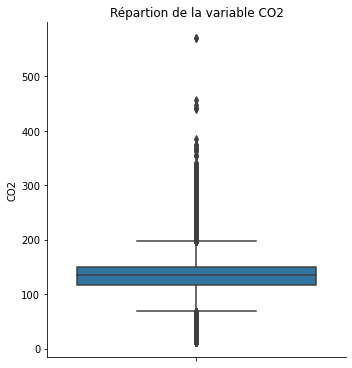

In [63]:
sns.catplot(y='CO2', data=df, kind='box')
plt.title('Répartion de la variable CO2');

C:\Users\myco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


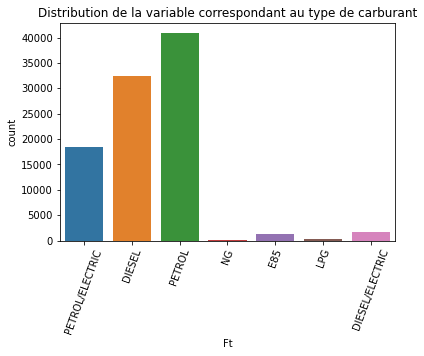

In [64]:
sns.countplot(df['Ft'])
plt.title('Distribution de la variable correspondant au type de carburant')
plt.xticks(rotation=70);

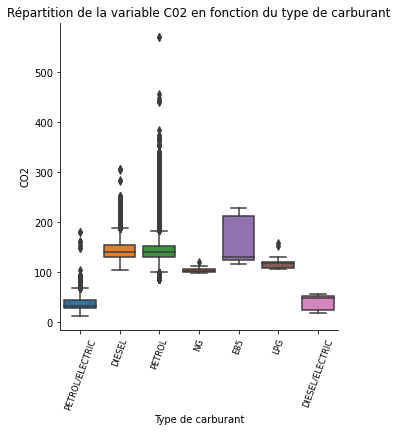

In [18]:
sns.catplot(x='Ft', y='CO2',data=df,kind='box')
plt.title('Répartition de la variable C02 en fonction du type de carburant')
plt.xlabel('Type de carburant')
plt.xticks(rotation=70, fontsize="small");

In [76]:
#Test ANOVA H0 : pas de significativité
import statsmodels.api
result = statsmodels.formula.api.ols('CO2 ~ Ft', data=df).fit()
table=statsmodels.api.stats.anova_lm(result)
display(table)
#On rejette H0, il y a une influence significative

,df,sum_sq,mean_sq,F,PR(>F)
Ft,4.0,6.669239e+05,166730.964008,261.417969,1.659581e-223
Residual,74844.0,4.773510e+07,637.794582,NaN,NaN


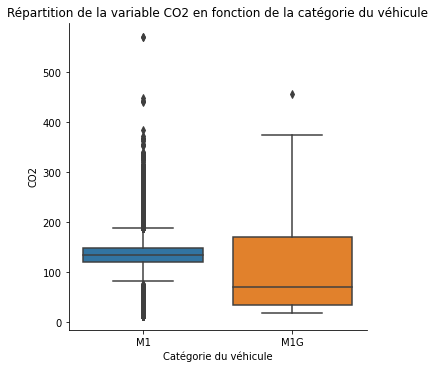

In [23]:
sns.catplot(x='Cr', y='CO2', data=df, kind='box')
plt.title('Répartition de la variable CO2 en fonction de la catégorie du véhicule')
plt.xlabel('Catégorie du véhicule');

In [79]:
#Test ANOVA H0 : pas de significativité
import statsmodels.api
result = statsmodels.formula.api.ols('CO2 ~ Cr', data=df).fit()
table=statsmodels.api.stats.anova_lm(result)
display(table)
#On rejette H0, il y a une influence significative

,df,sum_sq,mean_sq,F,PR(>F)
Cr,1.0,6.676778e+06,6.676778e+06,11976.845289,0.0
Residual,74847.0,4.172524e+07,5.574738e+02,NaN,NaN


##CO2 en fonction du mode carburant

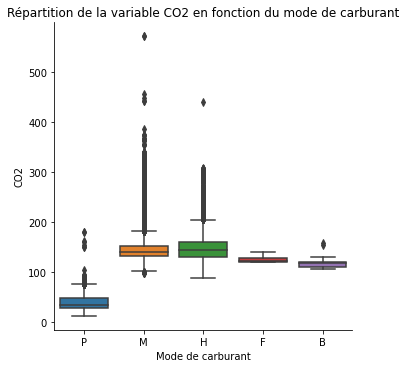

In [24]:
sns.catplot(x='Fm', y='CO2', data=df, kind='box')
plt.title('Répartition de la variable CO2 en fonction du mode de carburant')
plt.xlabel('Mode de carburant');

In [50]:
#Test de significativité
#Test ANOVA H0 : pas de significativité
import statsmodels.api
result = statsmodels.formula.api.ols('CO2 ~ Fm', data=df).fit()
table=statsmodels.api.stats.anova_lm(result)
display(table)
#On rejette H0, il y a une influence significative

,df,sum_sq,mean_sq,F,PR(>F)
Fm,4.0,1.828720e+08,4.571801e+07,82849.683463,0.0
Residual,94989.0,5.241671e+07,5.518187e+02,NaN,NaN


In [84]:
#df_num = df.select_dtypes(include=['int','float'])

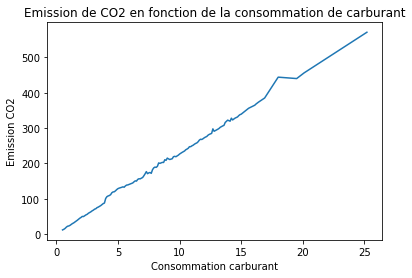

In [26]:
#émission co2 en fonction de la consommation carburant
consommation=df.groupby('Fuel consumption ')['CO2'].mean()
plt.plot(consommation)
plt.xlabel('Consommation carburant')
plt.ylabel('Emission CO2')
plt.title('Emission de CO2 en fonction de la consommation de carburant');

In [52]:
#Test de Pearson
#H0 : les variables ne sont pas corrélées
from scipy.stats import pearsonr
pearsonr(df['CO2'],df['Fuel consumption '])
#on rejette H0 , il y a significativité

PearsonRResult(statistic=0.9799837215657591, pvalue=0.0)

####émission CO2 en fonction de la puissance du moteur

C:\Users\myco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


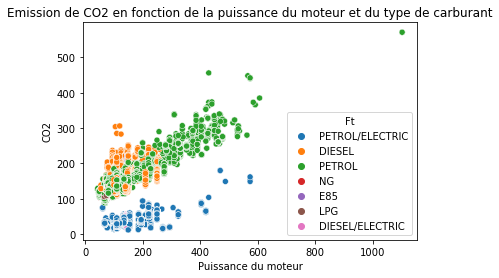

In [32]:
sns.scatterplot(df['ep (KW)'], df['CO2'], hue=df['Ft'])
plt.title('Emission de CO2 en fonction de la puissance du moteur et du type de carburant')
plt.xlabel('Puissance du moteur');

In [93]:
#Test de Pearson
#H0 : les variables ne sont pas corrélées
from scipy.stats import pearsonr
pearsonr(df['CO2'],df['ep (KW)'])
#on rejette H0 , il y a significativité

PearsonRResult(statistic=0.7853731478970354, pvalue=0.0)

C:\Users\myco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


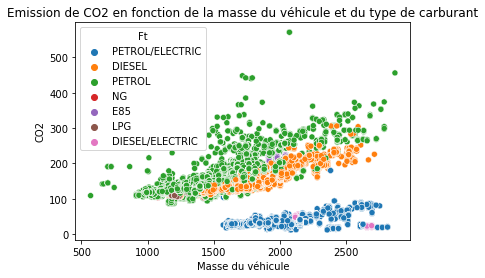

In [47]:
sns.scatterplot(df['m (kg)'], df['CO2'], hue=df['Ft'])
plt.title('Emission de CO2 en fonction de la masse du véhicule et du type de carburant')
plt.xlabel('Masse du véhicule');

## Renommer les colonnes

In [65]:
df=df.rename({'m (kg)':'m', 'W (mm)':'W', 'At1 (mm)':'At1', 'At2 (mm)':'At2', 'ec (cm3)':'ec', 'ep (KW)':'ep','z (Wh/km)':'z','Fuel consumption ':'Fuel_consumption','Electric range (km)':'Electric_range'}, axis=1)

## Valeurs manquantes

In [66]:
df.isna().sum()

Cr                      0
m                       0
Mt                      0
CO2                     0
W                       0
At1                     0
At2                     0
Ft                      0
Fm                      0
ec                      0
ep                      0
z                   74849
Fuel_consumption        0
Electric_range      74849
dtype: int64

In [39]:
df['Ft'][df['z'].isnull()].value_counts()

PETROL    40819
DIESEL    32445
E85        1333
LPG         215
NG           37
Name: Ft, dtype: int64

In [40]:
df['Ft'][~df['z'].isnull()].value_counts()

PETROL/ELECTRIC    18405
DIESEL/ELECTRIC     1740
Name: Ft, dtype: int64

In [67]:
## Remplacement des valeurs manquantes par 0 car les véhicules thermiques ne consomment pas d'énergie électrique
df['z']=df['z'].fillna(0)
df['Electric_range']=df['Electric_range'].fillna(0)

## Encodage des variables catégorielles

In [71]:
df_cod = pd.get_dummies(data=df, dtype=int, drop_first=True)

In [72]:
df_cod.head()

,m,Mt,CO2,W,At1,At2,ec,ep,z,Fuel_consumption,...,Ft_DIESEL/ELECTRIC,Ft_E85,Ft_LPG,Ft_NG,Ft_PETROL,Ft_PETROL/ELECTRIC,Fm_F,Fm_H,Fm_M,Fm_P
ID,,,,,,,,,,,,,,,,,,,,,
77798939,1797,1888,30,2785,1600,1605,1598.0,132,159.0,1.3,...,0,0,0,0,0,1,0,0,0,1
77798940,1797,1876,29,2785,1600,1605,1598.0,132,159.0,1.3,...,0,0,0,0,0,1,0,0,0,1
77798941,1797,1886,30,2785,1600,1605,1598.0,132,159.0,1.3,...,0,0,0,0,0,1,0,0,0,1
77798942,1797,1895,30,2785,1600,1605,1598.0,132,159.0,1.3,...,0,0,0,0,0,1,0,0,0,1
77798943,1797,1874,29,2785,1600,1605,1598.0,132,159.0,1.3,...,0,0,0,0,0,1,0,0,0,1


In [73]:
df_cod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94994 entries, 77798939 to 77955102
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   m                   94994 non-null  int64  
 1   Mt                  94994 non-null  int64  
 2   CO2                 94994 non-null  int64  
 3   W                   94994 non-null  int64  
 4   At1                 94994 non-null  int64  
 5   At2                 94994 non-null  int64  
 6   ec                  94994 non-null  float64
 7   ep                  94994 non-null  int64  
 8   z                   94994 non-null  float64
 9   Fuel_consumption    94994 non-null  float64
 10  Electric_range      94994 non-null  float64
 11  Cr_M1G              94994 non-null  int32  
 12  Ft_DIESEL/ELECTRIC  94994 non-null  int32  
 13  Ft_E85              94994 non-null  int32  
 14  Ft_LPG              94994 non-null  int32  
 15  Ft_NG               94994 non-null  int32  

In [74]:
df_cod.to_csv("./data_CO2_nettoyee.csv")